In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

### Prep the data for Modeling

In [3]:
# Read in and clean data
import nltk
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import string

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('/content/spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages['label'] = np.where(messages['label']=='spam', 1, 0)

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

messages['clean_text'] = messages['text'].apply(lambda x: clean_text(x))
messages.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [4]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(messages['clean_text'],
                                                    messages['label'], test_size=0.2)

In [5]:
# What do the first ten messages in the training set look like?
X_train[:]

1052    [got, another, job, one, hospital, data, analy...
3244              [ok, anybody, asks, abt, u, tel, themp]
3859                    [yep, like, pink, furniture, tho]
3696    [winner, specially, selected, receive, å, 1000...
2532                                            [yup, ok]
                              ...                        
240        [tomarrow, final, hearing, laptop, case, cant]
2180    [babe, goes, day, sip, cappuccino, think, love...
608                                      [neva, mind, ok]
2120    [argh, 3g, spotty, anyway, thing, remember, re...
739     [haha, mayb, ure, rite, u, know, well, da, fee...
Name: clean_text, Length: 4457, dtype: object

In [6]:
# What do the labels look like?
y_train[:10]

1052    0
3244    0
3859    0
3696    1
2532    0
3823    0
967     0
2321    0
3905    0
1829    1
Name: label, dtype: int64

In [7]:
# Let's save the training and test sets to ensure we are using the same data for each model
X_train.to_csv('/content/X_train.csv', index=False, header=True)
X_test.to_csv('/content/X_test.csv', index=False, header=True)
y_train.to_csv('/content/y_train.csv', index=False, header=True)
y_test.to_csv('/content/y_test.csv', index=False, header=True)

In [9]:
# Load the cleaned training and test sets
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')

X_train.head()

,clean_text
0,"['got', 'another', 'job', 'one', 'hospital', '..."
1,"['ok', 'anybody', 'asks', 'abt', 'u', 'tel', '..."
2,"['yep', 'like', 'pink', 'furniture', 'tho']"
3,"['winner', 'specially', 'selected', 'receive',..."
4,"['yup', 'ok']"


### Build Model on TF-IDF Vectors

In [12]:
# Instantiate and fit a TFIDF vectorizer and then use that trained vectorizer
# to transform the messages in the training and test sets
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])
X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

In [13]:
# What words did the vectorizer learn?
tfidf_vect.vocabulary_

{'got': 3362,
 'another': 1064,
 'job': 4050,
 'one': 5271,
 'hospital': 3689,
 'data': 2291,
 'analysis': 1042,
 'something': 6673,
 'starts': 6827,
 'monday': 4854,
 'sure': 7012,
 'thesis': 7236,
 'finished': 3006,
 'ok': 5243,
 'anybody': 1076,
 'asks': 1182,
 'abt': 847,
 'tel': 7144,
 'themp': 7225,
 'yep': 8166,
 'like': 4367,
 'pink': 5555,
 'furniture': 3190,
 'tho': 7261,
 'winner': 7954,
 'specially': 6740,
 'selected': 6355,
 'receive': 5973,
 '1000': 240,
 'cash': 1785,
 '2000': 373,
 'award': 1251,
 'speak': 6734,
 'live': 4409,
 'operator': 5294,
 'claim': 1933,
 'call': 1702,
 '087147123779am7pm': 101,
 'cost': 2138,
 '10p': 256,
 'yup': 8228,
 'miss': 4793,
 'much': 4928,
 'im': 3815,
 'desparate': 2407,
 'recorded': 5987,
 'message': 4733,
 'left': 4314,
 'day': 2304,
 'listen': 4399,
 'hear': 3539,
 'sound': 6712,
 'voice': 7738,
 'love': 4493,
 'want': 7794,
 'come': 2018,
 'backa': 1278,
 'beautiful': 1359,
 'necklace': 5015,
 'token': 7356,
 'heart': 3543,
 'youth

In [14]:
# How are these vectors stored?
X_test_vect[0]

<1x8250 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [25]:
# Can we convert the vectors to arrays?
a=X_test_vect[0].toarray()

In [15]:
# Fit a basic Random Forest model on these vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [16]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect)

In [17]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 1.0 / Recall: 0.816 / Accuracy: 0.975


### Build Model on Word2vec Vectors

In [18]:
# Load the cleaned training and test sets
import gensim
import numpy as np
import pandas as pd

In [19]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [104]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train['clean_text']])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test['clean_text']])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4457,) + inhomogeneous part.

In [20]:
# Replace the words in each text message with the learned word vector
# words = set(w2v_model.wv.index_to_key )

w2v_vect_test = []
for ls in X_test['clean_text']:
    vectors = [w2v_model.wv[i] for i in ls if i in w2v_model.wv.key_to_index]
    if vectors:
        w2v_vect_test.append(np.array(vectors))
    else:
        # If no word vectors are found for the sentence,append a zero vector
        w2v_vect_test.append(np.zeros((1, w2v_model.vector_size)))

# Filter out empty arrays (those with zero vectors)
w2v_vect_test = [seq for seq in w2v_vect_test if seq.size > 0]

# Convert the list to a numpy array
X_test_vect = np.array(w2v_vect_test, dtype=object)

w2v_vect_train = []
for ls in X_train['clean_text']:
    vectors = [w2v_model.wv[i] for i in ls if i in w2v_model.wv.key_to_index]
    if vectors:
        w2v_vect_train.append(np.array(vectors))
    else:
        # If no word vectors are found for the sentence,append a zero vector
        w2v_vect_train.append(np.zeros((1, w2v_model.vector_size)))

# Filter out empty arrays (those with zero vectors)
w2v_vect_train = [seq for seq in w2v_vect_train if seq.size > 0]

# Convert the list to a numpy array
X_train_vect = np.array(w2v_vect_train, dtype=object)

X_train_vect_squeezed = np.squeeze(X_train_vect)
X_test_vect_squeezed = np.squeeze(X_test_vect)
print(X_train_vect.shape)
print(X_test_vect.shape)
print(X_train_vect_squeezed)
print(X_test_vect_squeezed)

(4457,)
(1115,)
[array([[-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
          0.00090146,  0.00639253],
        [-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
          0.00090146,  0.00639253],
        [-0.00861969,  0.00366574,  0.00518988, ..., -0.00239151,
         -0.00951009,  0.00450588],
        ...,
        [-0.00861969,  0.00366574,  0.00518988, ..., -0.00239151,
         -0.00951009,  0.00450588],
        [-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
          0.00090146,  0.00639253],
        [-0.00861969,  0.00366574,  0.00518988, ..., -0.00239151,
         -0.00951009,  0.00450588]], dtype=float32)
 array([[-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
         -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
         -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
         -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
          2.8765798e-03,  9.9187379e-04, -8.2852151

In [21]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [22]:
# What does the unaveraged version look like?
len(X_train_vect[0])

15

In [23]:
X_train_vect_avg = np.array(X_train_vect_avg)

In [24]:
# Check and print the shape of X_train_vect_avg
print("Shape of X_train_vect_avg before reshaping:", X_train_vect_avg.shape)

Shape of X_train_vect_avg before reshaping: (4457, 100)


In [25]:
# Reshape if necessary
if len(X_train_vect_avg.shape) == 1 or X_train_vect_avg.shape[0] == 1:
    X_train_vect_avg = np.vstack(X_train_vect_avg)

# Check the shape after reshaping
print("Shape of X_train_vect_avg after reshaping:", X_train_vect_avg.shape)

Shape of X_train_vect_avg after reshaping: (4457, 100)


In [26]:
y_train.shape

(4457, 1)

In [27]:
type(X_train_vect_avg)

numpy.ndarray

In [28]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [29]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [30]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.525 / Recall: 0.276 / Accuracy: 0.867


### Build Model on doc2vec Vectors

In [31]:
for i, v in enumerate(X_train['clean_text']):
  print(i)
  print(v)


Streaming output truncated to the last 5000 lines.
1957
['dont', 'think', 'spatula', 'hands']
1958
['beautiful', 'tomorrow', 'never', 'comes', 'comes', 'already', 'today', 'hunt', 'beautiful', 'tomorrow', 'dont', 'waste', 'wonderful', 'today', 'goodmorning']
1959
['ok', 'come', 'ur', 'home', 'half', 'hour']
1960
['told', 'accenture', 'confirm', 'true']
1961
['help', 'propose', 'going', 'back', 'tomorrow']
1962
['much', 'bad', 'avoid', 'like']
1963
['put', 'party', '7', 'days', 'week', 'study', 'lightly', 'think', 'need', 'draw', 'custom', 'checkboxes', 'know', 'hardcore']
1964
['û', 'thing', 'apes', 'u', 'fight', 'death', 'keep', 'something', 'minute', 'u', 'let', 'go', 'thats']
1965
['available', 'soiree', 'june', '3rd']
1966
['tone', 'club', 'subs', 'expired', '2', 'resub', 'reply', 'monoc', '4', 'monos', 'polyc', '4', 'polys', '1', 'weekly', '150p', 'per', 'week', 'txt', 'stop', '2', 'stop', 'msg', 'free', 'stream', '0871212025016']
1967
['somebody', 'go', 'andros', 'steal', 'ice']


In [32]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train['clean_text'])]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test['clean_text'])]

In [56]:
tagged_docs_train[:10]

[TaggedDocument(words="['got', 'another', 'job', 'one', 'hospital', 'data', 'analysis', 'something', 'starts', 'monday', 'sure', 'thesis', 'got', 'finished']", tags=[0]),
 TaggedDocument(words="['ok', 'anybody', 'asks', 'abt', 'u', 'tel', 'themp']", tags=[1]),
 TaggedDocument(words="['yep', 'like', 'pink', 'furniture', 'tho']", tags=[2]),
 TaggedDocument(words="['winner', 'specially', 'selected', 'receive', 'å', '1000', 'cash', 'å', '2000', 'award', 'speak', 'live', 'operator', 'claim', 'call', '087147123779am7pm', 'cost', '10p']", tags=[3]),
 TaggedDocument(words="['yup', 'ok']", tags=[4]),
 TaggedDocument(words="['miss', 'much', 'im', 'desparate', 'recorded', 'message', 'left', 'day', 'listen', 'hear', 'sound', 'voice', 'love']", tags=[5]),
 TaggedDocument(words="['u', 'want', 'come', 'backa', 'beautiful', 'necklace', 'token', 'heart', 'youthats', 'give', 'wife', 'likingbe', 'seeno', 'one', 'give', 'thatdont', 'call', 'mei', 'wait', 'till', 'come']", tags=[6]),
 TaggedDocument(words=

In [37]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size = 100,
                                  window = 5,
                                  min_count = 2)

In [38]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]

### Fit RandomForestClassifier On top of Document Vectors

In [55]:
# Fit a basic model, make predictions on the holdoutset and then generate the evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

rf = RandomForestClassifier()
rf_model = rf.fit(train_vectors, y_train.values.ravel())

y_pred = rf_model.predict(test_vectors)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall : {} / Accuracy: {}'.format(
   round(precision, 3), round(recall, 3), round(y_pred==y_test['label']).sum()/len(y_pred), 3
                                                ))

Precision: 0.923 / Recall : 0.395 / Accuracy: 0.9130044843049328


In [47]:
round((y_pred==y_test['label']).sum()/len(y_pred), 3)

0.867

### Build a Basic RNN model

Read in Cleaned text

In [59]:
# Load the cleaned training and test sets
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [61]:
# Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

In [62]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [63]:
# Import the tools needed and use our previously defined functions to calculate precision and recall
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [64]:
# Construct our basic RNN model framework
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          265056    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 274465 (1.05 MB)
Trainable params: 274465 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [66]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train['label'],
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 20s 86ms/step - loss: 0.3076 - accuracy: 0.8986 - precision_m: 0.4189 - recall_m: 0.3030 - val_loss: 0.1153 - val_accuracy: 0.9713 - val_precision_m: 0.9333 - val_recall_m: 0.7712
Epoch 2/10
140/140 [==============================] - 8s 60ms/step - loss: 0.0410 - accuracy: 0.9897 - precision_m: 0.9670 - recall_m: 0.9139 - val_loss: 0.0647 - val_accuracy: 0.9812 - val_precision_m: 0.9607 - val_recall_m: 0.9153
Epoch 3/10
140/140 [==============================] - 10s 72ms/step - loss: 0.0138 - accuracy: 0.9962 - precision_m: 0.9762 - recall_m: 0.9649 - val_loss: 0.0817 - val_accuracy: 0.9812 - val_precision_m: 0.9786 - val_recall_m: 0.8963
Epoch 4/10
140/140 [==============================] - 10s 68ms/step - loss: 0.0052 - accuracy: 0.9989 - precision_m: 0.9917 - recall_m: 0.9846 - val_loss: 0.0806 - val_accuracy: 0.9839 - val_precision_m: 0.9690 - val_recall_m: 0.9210
Epoch 5/10
140/140 [==============================] - 9s 64ms/ste

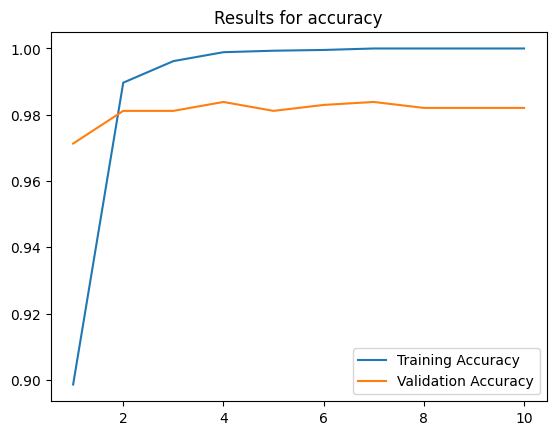

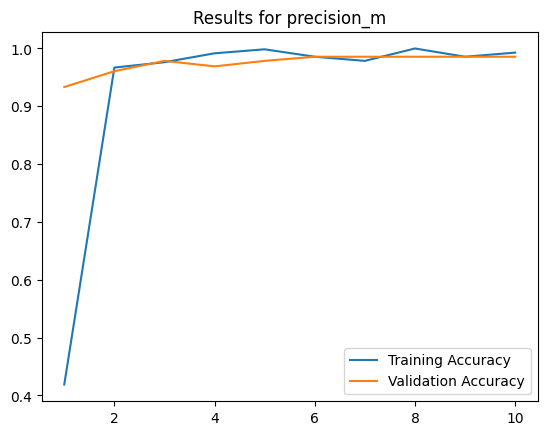

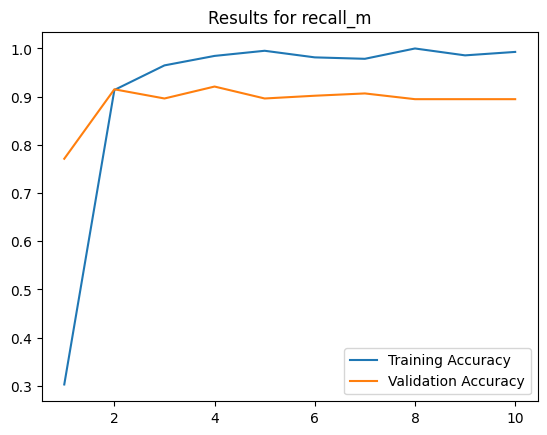

In [67]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()